<a href="https://colab.research.google.com/github/beelittlehoney/CCADMACL_EXERCISES_COM222ML/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Use all feature selection methods to find the best features

## Dataset Information

## Features

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target
``
Attribute Information:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

## Target
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [322]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np

In [323]:
housing = fetch_california_housing(as_frame=True)
df = pd.concat([housing.data, housing.target], axis=1)

In [324]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


1. Use any filter method to select the best features

In [325]:
X = housing.data
y = housing.target

threshold = 5
high_score_features = []
feature_scores = mutual_info_regression(X, y, random_state=0)

sorted_features = sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]

print("Best Features:\n")
for score, f_name in sorted_features:
    print(f"{f_name}: {score}")
    high_score_features.append(f_name)


X_high_score = X[high_score_features]

print("\nSelected Features:")
print(X_high_score.columns)

Best Features:

Longitude: 0.4018195828289901
MedInc: 0.38764599736258987
Latitude: 0.3706566756286751
AveRooms: 0.10362300978707584
AveOccup: 0.07254907984228254

Selected Features:
Index(['Longitude', 'MedInc', 'Latitude', 'AveRooms', 'AveOccup'], dtype='object')


2. Use any wrapper method to select the best features

Best number of features: 6


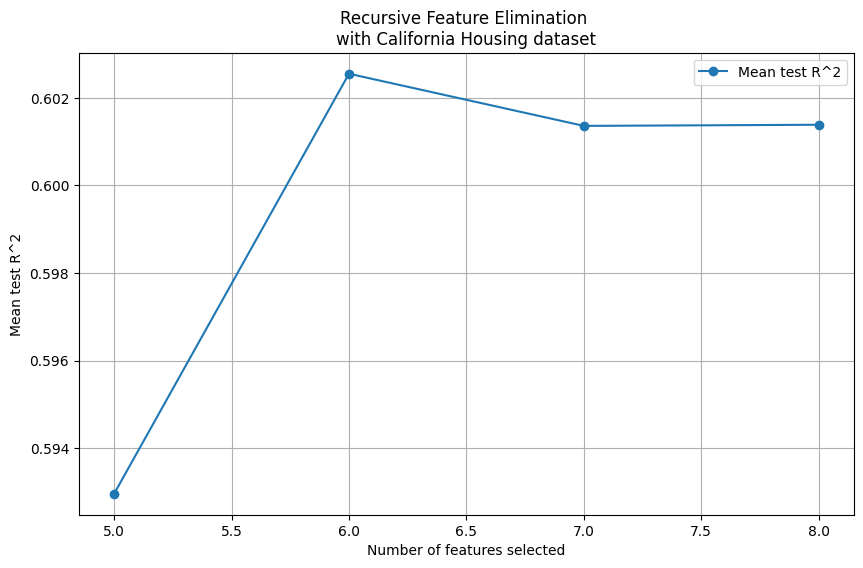


Best features selected:
MedInc
HouseAge
AveRooms
AveBedrms
Latitude
Longitude


In [326]:
X = housing.data
y = housing.target

min_features_to_select = 5
model = Ridge()
cv = KFold(5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

rfecv.fit(X, y)

print(f"Best number of features: {rfecv.n_features_}")

plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Mean test R^2")
plt.plot(
        range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
        rfecv.cv_results_['mean_test_score'],
        marker="o",
        label="Mean test R^2",
    )
plt.title("Recursive Feature Elimination \nwith California Housing dataset")
plt.legend()
plt.grid()
plt.show()

best_features = X.columns[rfecv.support_]
print("\nBest features selected:")
for feature in best_features:
    print(feature)

3. Use any embedded methood to select the best features

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest_model = RandomForestRegressor(random_state=0)

forest_model.fit(X_train, y_train)

forest_feature_importance = pd.Series(forest_model.feature_importances_, index=X_train.columns)

top_forest_features = forest_feature_importance.sort_values(ascending=False).head(5)

print("Best Features from Random Forest:\n")
print(top_forest_features)

y_pred = forest_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRMSE on test set: {rmse:.4f}")

print("\nPredictions on test set:\n")
print(y_pred[:5])

Best Features from Random Forest:

MedInc       0.525229
AveOccup     0.138097
Latitude     0.089253
Longitude    0.088784
HouseAge     0.054608
dtype: float64

RMSE on test set: 0.5049

Predictions on test set:

[0.48638   0.71773   4.7931662 2.54603   2.30031  ]


# Evaluate The Model

In [328]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Final Prediction

In [329]:
filter_features = ['Longitude', 'MedInc', 'Latitude', 'AveRooms', 'AveOccup']
wrapper_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude']

X_train_filter = X_train[filter_features]
X_test_filter = X_test[filter_features]

X_train_wrapper = X_train[wrapper_features]
X_test_wrapper = X_test[wrapper_features]

model = Ridge()

rmse_filter = evaluate_model(model, X_train_filter, X_test_filter, y_train, y_test)
rmse_wrapper = evaluate_model(model, X_train_wrapper, X_test_wrapper, y_train, y_test)

forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

feature_importances = pd.Series(forest_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(5).index

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

rmse_top_features = rmse
rmse_default = evaluate_model(model, X_train, X_test, y_train, y_test)

print("Performance for each feature selection method (RMSE):")
print(f"1. Default Model (All Features) - RMSE: {rmse_default:.4f}")
print(f"2. Filter Method (Selected Features) - RMSE: {rmse_filter:.4f}")
print(f"3. Wrapper Method (Selected Features) - RMSE: {rmse_wrapper:.4f}")
print(f"4. Top Features from Random Forest - RMSE: {rmse_top_features:.4f}")

Performance for each feature selection method (RMSE):
1. Default Model (All Features) - RMSE: 0.7455
2. Filter Method (Selected Features) - RMSE: 0.7478
3. Wrapper Method (Selected Features) - RMSE: 0.7988
4. Top Features from Random Forest - RMSE: 0.5049
